In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
from string import digits


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kavit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kavit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import re
from nltk.corpus import wordnet 

In [3]:
df = pd.read_excel('da_task2.xlsx')

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [85]:
df['TRANSACTION_ID'] = df['TRANSACTION_ID'].astype('category')

In [86]:
df['SALES_REGION_CODE'] = df['SALES_REGION_CODE'].astype('category')

In [90]:
df['DEALER_REGION'] = df['DEALER_REGION'].astype('category')

In [92]:
df['GLOBAL_LABOR_CODE'] = df['GLOBAL_LABOR_CODE'].astype('category')

In [101]:
df['SRC_TXN_ID'] = df['SRC_TXN_ID'].astype('category')

In [102]:
df['LAST_KNOWN_DELVRY_TYPE_CD'] = df['LAST_KNOWN_DELVRY_TYPE_CD'].astype('category')

In [107]:
df['NON_CAUSAL_PART_QTY'] = df['NON_CAUSAL_PART_QTY'].astype('category')

In [103]:
df.describe()

,REPAIR_DATE,REPAIR_AGE,KM,ORD_SELLING_SRC_CD,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_VER_NBR,NON_CAUSAL_PART_QTY
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,8.800000e+01,100.000000,100.000000
mean,2024-01-22 07:26:24,14.940000,24914.230000,24.590000,531.193200,554.925900,106.344900,1.676383e+08,5.720000,0.070000
min,2024-01-02 00:00:00,0.000000,3.000000,11.000000,27.690000,27.690000,20.000000,2.878270e+05,2.000000,0.000000
25%,2024-01-12 00:00:00,5.000000,8883.250000,13.000000,305.432500,349.940000,61.855000,2.878270e+05,4.000000,0.000000
50%,2024-01-24 12:00:00,12.000000,21962.000000,13.000000,433.970000,457.225000,78.560000,8.042172e+06,4.000000,0.000000
75%,2024-02-01 00:00:00,21.000000,35493.250000,48.000000,554.062500,572.772500,108.055000,1.774929e+07,6.000000,0.000000
max,2024-02-07 00:00:00,50.000000,107905.000000,72.000000,2457.450000,3205.450000,1012.670000,8.282984e+08,26.000000,1.000000
std,NaN,12.367945,20747.078206,17.822976,411.161608,439.561893,113.223074,3.237538e+08,4.040402,0.256432


Text(0.5, 1.0, 'Types of Plant')

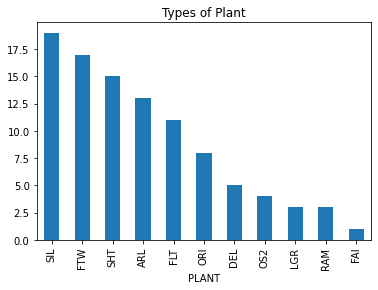

In [254]:
df['PLANT'].value_counts().plot(kind = 'bar')
plt.title('Types of Plant')

In [27]:
df['PLANT'].isnull().sum()

1

In [29]:
df['PLANT'] = df['PLANT'].fillna(df['PLANT'].mode())

Text(0.5, 1.0, 'Type of Platform')

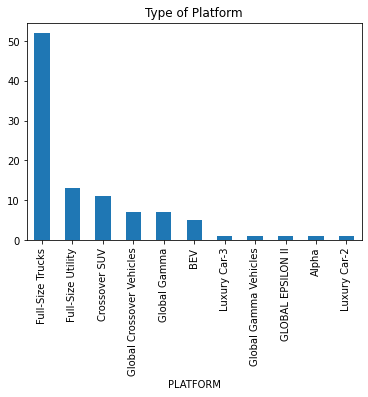

In [255]:
df['PLATFORM'].value_counts().plot(kind = 'bar')
plt.title('Type of Platform')

In [31]:
df['PLATFORM'].isnull().sum()

0

Text(0.5, 1.0, 'Types of Body Style')

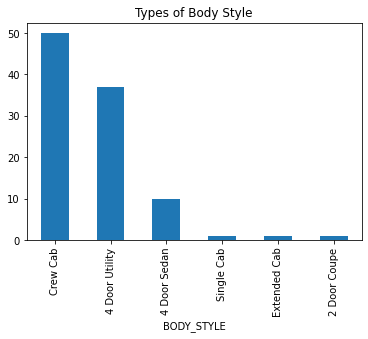

In [256]:
df['BODY_STYLE'].value_counts().plot(kind = 'bar')
plt.title('Types of Body Style')

In [32]:
df['BODY_STYLE'].isnull().sum()

0

<AxesSubplot: xlabel='VPPC'>

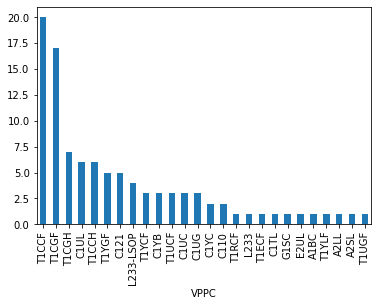

In [17]:
df['VPPC'].value_counts().plot(kind = 'bar')

In [33]:
df['VPPC'].isnull().sum()

0

Text(0.5, 1.0, 'Count of Build Country')

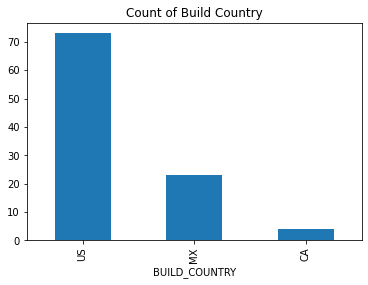

In [257]:
df['BUILD_COUNTRY'].value_counts().plot(kind = 'bar')
plt.title('Count of Build Country')

In [34]:
df['BUILD_COUNTRY'].isnull().sum()

0

Text(0.5, 1.0, 'Frequency Count of States')

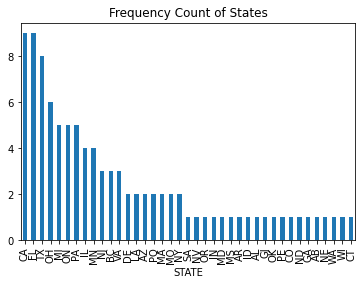

In [259]:
df['STATE'].value_counts().plot(kind = 'bar')
plt.title('Frequency Count of States')

In [35]:
df['STATE'].isnull().sum()

2

In [36]:
df['STATE'] = df['STATE'].fillna(df['STATE'].mode())

In [260]:
df['REPAIR_AGE'].median()

12.0

<AxesSubplot: ylabel='REPAIR_AGE'>

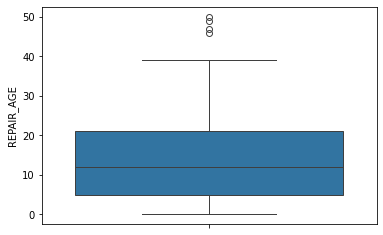

In [21]:
sns.boxplot(df['REPAIR_AGE'])

<AxesSubplot: xlabel='REPAIR_AGE', ylabel='Count'>

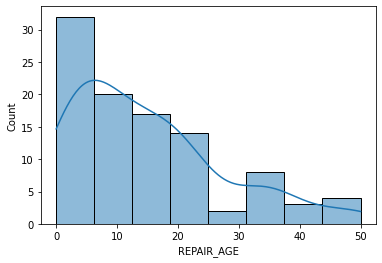

In [24]:
sns.histplot(df['REPAIR_AGE'], kde = True)

In [26]:
df['REPAIR_AGE'] = df['REPAIR_AGE'].fillna(df['REPAIR_AGE'].median())

In [38]:
df['KM'].nunique()

100

<AxesSubplot: xlabel='COMPLAINT_CD_CSI'>

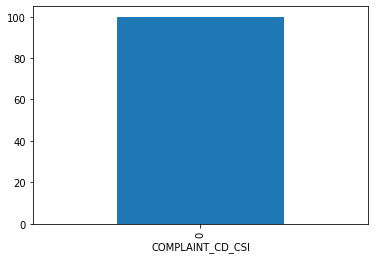

In [40]:
df['COMPLAINT_CD_CSI'].value_counts().plot(kind = 'bar')

In [82]:
df.drop('COMPLAINT_CD_CSI', axis = 1, inplace = True)

<AxesSubplot: xlabel='COMPLAINT_CD'>

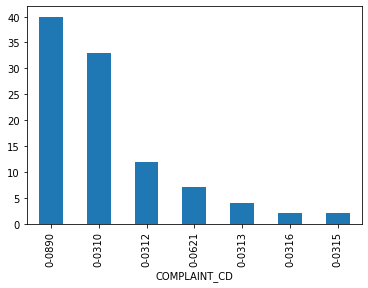

In [42]:
df['COMPLAINT_CD'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'VEH_TEST_GRP')

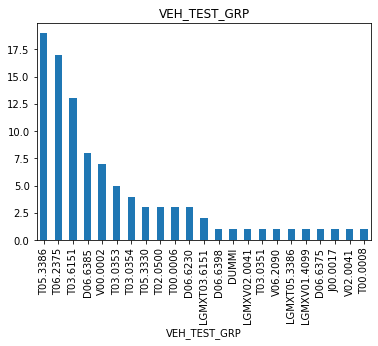

In [261]:
df['VEH_TEST_GRP'].value_counts().plot(kind = 'bar')
plt.title('VEH_TEST_GRP')

<AxesSubplot: xlabel='TRANSACTION_CATEGORY'>

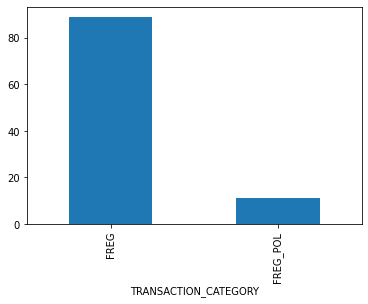

In [47]:
df['TRANSACTION_CATEGORY'].value_counts().plot(kind = 'bar')

In [48]:
df['TRANSACTION_CATEGORY'].isnull().sum()

0

In [50]:
df['CAMPAIGN_NBR'].isnull().sum()

100

In [52]:
df.drop('CAMPAIGN_NBR', axis = 1, inplace = True)

In [55]:
df['TRANSACTION_CNTR'].value_counts()

TRANSACTION_CNTR
1    100
Name: count, dtype: int64

In [56]:
df.drop('TRANSACTION_CNTR', axis = 1, inplace = True)

<AxesSubplot: xlabel='REPORTING_COST', ylabel='Count'>

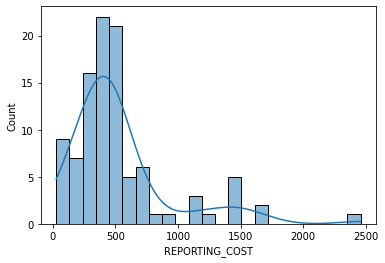

In [59]:
sns.histplot(df['REPORTING_COST'], kde = True)

<AxesSubplot: ylabel='REPORTING_COST'>

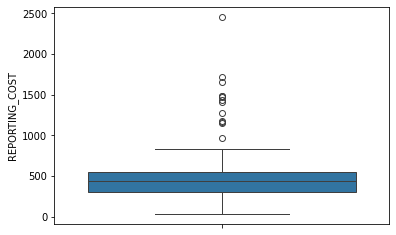

In [60]:
sns.boxplot(df['REPORTING_COST'])

In [61]:
df['REPORTING_COST'] = df['REPORTING_COST'].fillna(df['REPORTING_COST'].median())

<AxesSubplot: xlabel='TOTALCOST', ylabel='Count'>

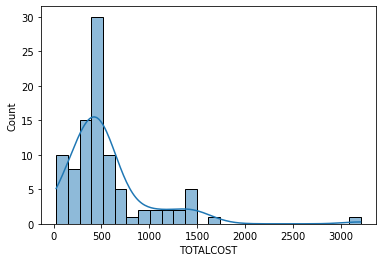

In [64]:
sns.histplot(df['TOTALCOST'], kde = True)

<AxesSubplot: ylabel='TOTALCOST'>

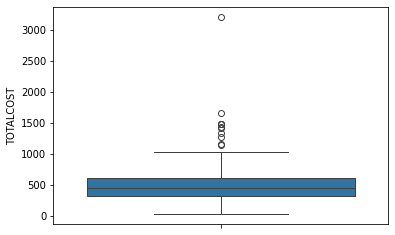

In [65]:
sns.boxplot(df['TOTALCOST'])

In [66]:
df['TOTALCOST'].isnull().sum()

6

In [67]:
df['TOTALCOST'] = df['TOTALCOST'].fillna(df['TOTALCOST'].median())

<AxesSubplot: xlabel='LBRCOST', ylabel='Count'>

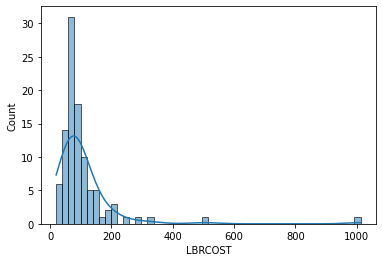

In [70]:
sns.histplot(df['LBRCOST'], kde = True)

<AxesSubplot: ylabel='LBRCOST'>

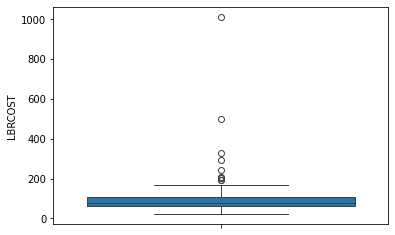

In [71]:
sns.boxplot(df['LBRCOST'])

In [72]:
df['LBRCOST'].isnull().sum()

0

Text(0.5, 1.0, 'Types of Engine')

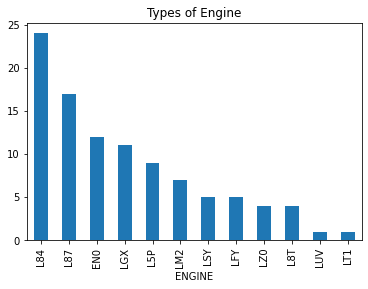

In [262]:
df['ENGINE'].value_counts().plot(kind = 'bar')
plt.title('Types of Engine')

<AxesSubplot: xlabel='TRANSMISSION'>

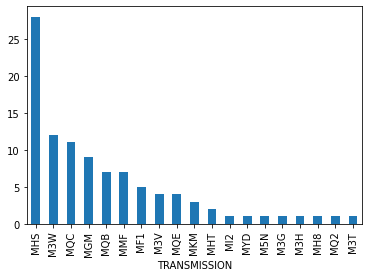

In [76]:
df['TRANSMISSION'].value_counts().plot(kind = 'bar')

<AxesSubplot: xlabel='TRANSMISSION_SOURCE_PLANT', ylabel='Count'>

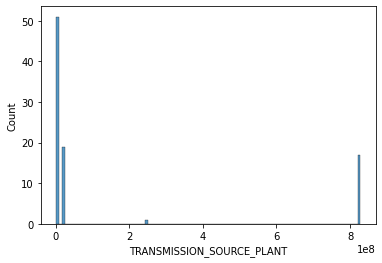

In [78]:
sns.histplot(df['TRANSMISSION_SOURCE_PLANT'])

In [79]:
df['TRANSMISSION_SOURCE_PLANT']

0        287827.0
1      17749294.0
2             NaN
3        287827.0
4      17749294.0
         ...     
95    822972980.0
96            NaN
97    822972980.0
98      8042172.0
99    822972980.0
Name: TRANSMISSION_SOURCE_PLANT, Length: 100, dtype: float64

<AxesSubplot: >

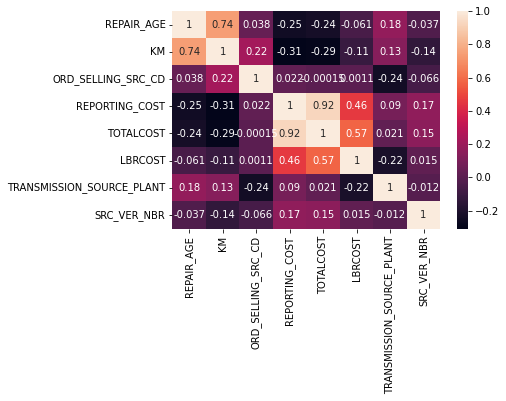

In [114]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [106]:
df['NON_CAUSAL_PART_QTY'].value_counts()

NON_CAUSAL_PART_QTY
0    93
1     7
Name: count, dtype: int64

Text(0.5, 1.0, 'Reporting Cost by Engine Type')

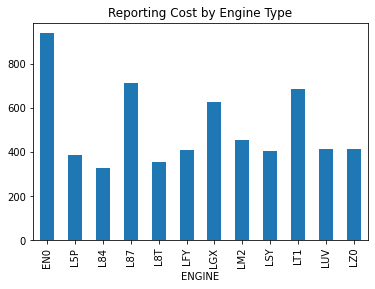

In [263]:
df.groupby('ENGINE')['REPORTING_COST'].mean().plot(kind = 'bar')
plt.title('Reporting Cost by Engine Type')

Text(0.5, 1.0, 'Total Cost by Engine Type')

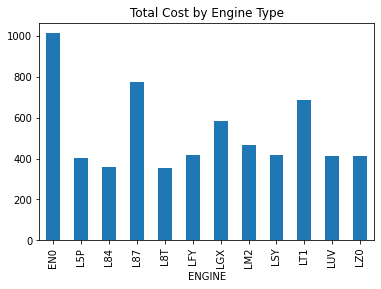

In [264]:
df.groupby('ENGINE')['TOTALCOST'].mean().plot(kind = 'bar')
plt.title('Total Cost by Engine Type')

Text(0.5, 1.0, 'Mean Repair Age by Engine type')

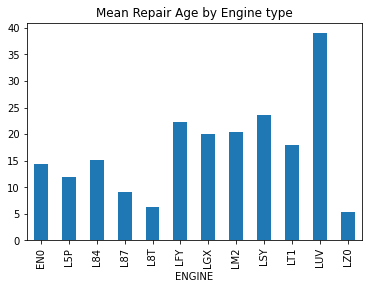

In [265]:
df.groupby('ENGINE')['REPAIR_AGE'].mean().plot(kind = 'bar')
plt.title('Mean Repair Age by Engine type')

In [117]:
df['ORD_SELLING_SRC_CD'].value_counts()

ORD_SELLING_SRC_CD
13    39
48    28
12    14
14    12
72     3
11     3
23     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Mean Total Cost by Transmission Type')

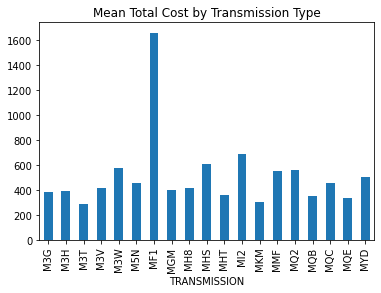

In [266]:
df.groupby('TRANSMISSION')['TOTALCOST'].mean().plot(kind = 'bar')
plt.title('Mean Total Cost by Transmission Type')

Text(0.5, 1.0, 'Total Cost by State')

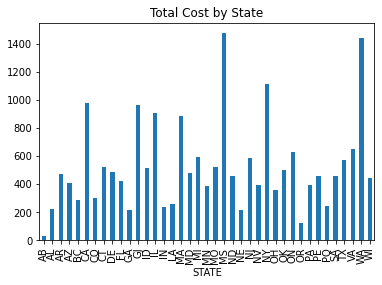

In [267]:
df.groupby('STATE')['TOTALCOST'].mean().plot(kind = 'bar')
plt.title('Total Cost by State')

<AxesSubplot: xlabel='STATE'>

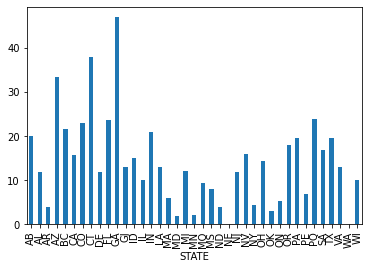

In [121]:
df.groupby('STATE')['REPAIR_AGE'].mean().plot(kind = 'bar')

Text(0.5, 1.0, 'Total Cost by Platform')

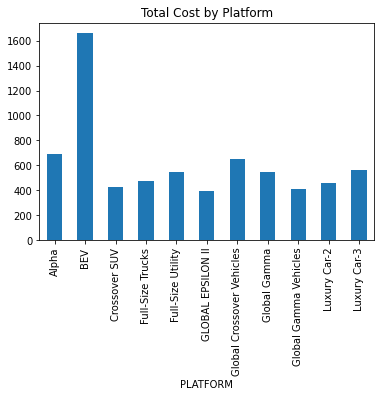

In [268]:
df.groupby('PLATFORM')['TOTALCOST'].mean().plot(kind = 'bar')
plt.title('Total Cost by Platform')

Text(0.5, 1.0, 'Mean Repair Age by platform')

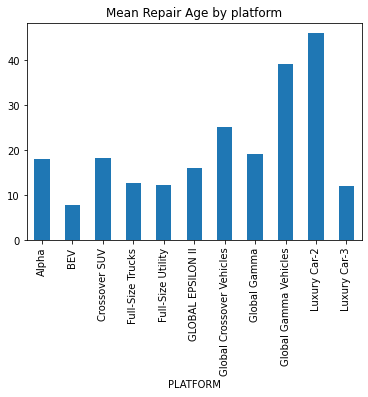

In [269]:
df.groupby('PLATFORM')['REPAIR_AGE'].mean().plot(kind = 'bar')
plt.title('Mean Repair Age by platform')

Text(0.5, 1.0, 'Mean Repair Age by Body Style')

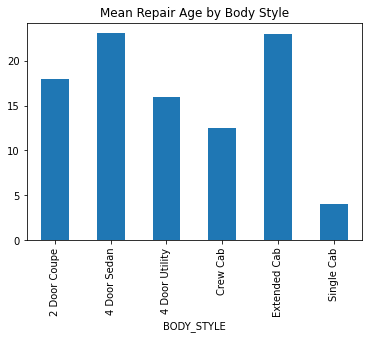

In [270]:
df.groupby(['BODY_STYLE'])['REPAIR_AGE'].mean().plot(kind = 'bar')
plt.title('Mean Repair Age by Body Style')

<AxesSubplot: xlabel='BODY_STYLE'>

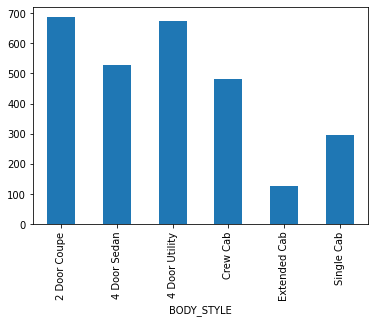

In [129]:
df.groupby(['BODY_STYLE'])['TOTALCOST'].mean().plot(kind = 'bar')

Text(0.5, 1.0, 'Mean Labour Cost by Body Style')

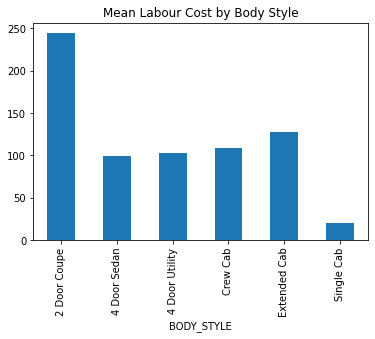

In [271]:
df.groupby(['BODY_STYLE'])['LBRCOST'].mean().plot(kind = 'bar')
plt.title('Mean Labour Cost by Body Style')

<AxesSubplot: xlabel='PLATFORM'>

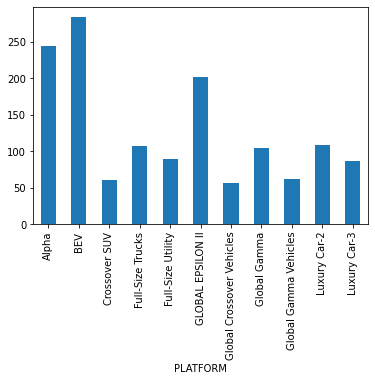

In [131]:
df.groupby(['PLATFORM'])['LBRCOST'].mean().plot(kind = 'bar')

In [132]:
df['ENGINE_DESC']

0     DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...
1     DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...
2                                                  NONE
3            GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5
4            GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5
                            ...                        
95     GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2
96                                                 NONE
97     GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2
98               GAS, 8 CYL, 6.6L, SIDI, VVT, CAST IRON
99     GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2
Name: ENGINE_DESC, Length: 100, dtype: object

In [133]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [134]:
import re
from collections import Counter
from spellchecker import SpellChecker

spelling = SpellChecker()

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open(r"E:\Machine Learning Project\big.txt").read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))
def spelling_checks(text):
    correct_result = []
    typo_words = spelling.unknown(text.split())
    for word in text.split():
        if word in typo_words:
            correct_word = spelling.correction(word)
            if correct_word != None:
                correct_result.append(correct_word)
            else:
                correct_result.append(correction(word))
        else:
            correct_result.append(word)
    return " ".join(correct_result)

In [135]:
def Negation(sentence):	
    temp = int(0)
    for i in range(len(sentence)):
        if sentence[i-1] in ['not',"n't", 'nothing']:
            antonyms = []
            for syn in wordnet.synsets(sentence[i]):
                syns = wordnet.synsets(sentence[i])
                w1 = syns[0].name()
                temp = 0
                for l in syn.lemmas():
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                max_dissimilarity = 0
                for ant in antonyms:
                    syns = wordnet.synsets(ant)
                    w2 = syns[0].name()
                    syns = wordnet.synsets(sentence[i])
                    w1 = syns[0].name()
                    word1 = wordnet.synset(w1)
                    word2 = wordnet.synset(w2)
                    if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                          temp = 1 - word1.wup_similarity(word2)
                    if temp>max_dissimilarity:
                            max_dissimilarity = temp
                            antonym_max = ant
                            sentence[i] = antonym_max
                            sentence[i-1] = ''
    while '' in sentence:
        sentence.remove('')
    return sentence

In [136]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'])
    return punctuationfree

In [137]:
def remove_stop_words(text):
    words = []
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text

In [138]:
def preprocess_text(text):
    text = re.sub(r' +', " ", text) #remove extra spaces between text
    text = text.lower() # turn all text to lower case
    text = decontracted(text) #expand contractions in the text
    text = re.sub(r'[0-9]+', '<NUMBER>', text) #replace digits with a <NUMBER> tag
    remove_digits = str.maketrans('', '', digits)
    res = text.translate(remove_digits) #remove digits in text string 
    text = re.sub(r'http\S+', '', res) #remove URL's
    text = re.sub(r'[\\/]+', ' ', text) 
    text = re.sub(r'[.]+', '. ', text) # replace period with space after the period
    words = word_tokenize(text)
    #typo_words = spelling.unknown(words) # do a spell check and get the words that are incorrectly spelled 
    #words = [spelling_checks(word) if word in typo_words else word for word in words] #correct the incorrectly spelt words
    #words = Negation(words)
    words = [word for word in words if word not in sw_spacy ] #remove stop words
    words = [remove_punctuation(word) for word in words] #remove punctuation
    lemmatiser = WordNetLemmatizer()
    words_stem = [lemmatiser.lemmatize(word) if word != '<NUMBER>' else word for word in words] #stem words
    words_stem = [word for word in words_stem if word] #remove empty strings
    return words_stem

In [139]:
import spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

In [141]:
preprocess_text(df.ENGINE_DESC[0])

['diesel',
 'NUMBER',
 'cyl',
 'NUMBER',
 'NUMBER',
 'l',
 'cri',
 'l',
 'NUMBER',
 'dohc',
 'turbo',
 'vgt',
 'alum',
 'cs',
 'NUMBER',
 'v',
 'var',
 'NUMBER']

In [174]:
engine_desc_l = []

In [175]:
for text in df.ENGINE_DESC:
    text = preprocess_text(text)
    engine_desc_l.append(text)
    

In [176]:
engine_desc_l

[['diesel',
  'NUMBER',
  'cyl',
  'NUMBER',
  'NUMBER',
  'l',
  'cri',
  'l',
  'NUMBER',
  'dohc',
  'turbo',
  'vgt',
  'alum',
  'cs',
  'NUMBER',
  'v',
  'var',
  'NUMBER'],
 ['diesel',
  'NUMBER',
  'cyl',
  'NUMBER',
  'NUMBER',
  'l',
  'cri',
  'l',
  'NUMBER',
  'dohc',
  'turbo',
  'vgt',
  'alum',
  'cs',
  'NUMBER',
  'v',
  'var',
  'NUMBER'],
 [],
 ['gas',
  'NUMBER',
  'cyl',
  'v',
  'NUMBER',
  'NUMBER',
  'NUMBER',
  'l',
  'di',
  'dfm',
  'alum',
  'gen',
  'NUMBER'],
 ['gas',
  'NUMBER',
  'cyl',
  'v',
  'NUMBER',
  'NUMBER',
  'NUMBER',
  'l',
  'di',
  'dfm',
  'alum',
  'gen',
  'NUMBER'],
 ['gas',
  'NUMBER',
  'cyl',
  'NUMBER',
  'NUMBER',
  'l',
  'v',
  'NUMBER',
  'di',
  'dfm',
  'alum',
  'gen',
  'NUMBER'],
 ['gas',
  'NUMBER',
  'cyl',
  'v',
  'NUMBER',
  'NUMBER',
  'NUMBER',
  'l',
  'di',
  'dfm',
  'alum',
  'gen',
  'NUMBER'],
 ['gas',
  'NUMBER',
  'cyl',
  'NUMBER',
  'NUMBER',
  'l',
  'v',
  'NUMBER',
  'di',
  'dfm',
  'alum',
  'gen',
 

In [177]:
engine_desc_vocab = [t for text in engine_desc_l for t in text]

In [178]:
engine_desc_vocab

['diesel',
 'NUMBER',
 'cyl',
 'NUMBER',
 'NUMBER',
 'l',
 'cri',
 'l',
 'NUMBER',
 'dohc',
 'turbo',
 'vgt',
 'alum',
 'cs',
 'NUMBER',
 'v',
 'var',
 'NUMBER',
 'diesel',
 'NUMBER',
 'cyl',
 'NUMBER',
 'NUMBER',
 'l',
 'cri',
 'l',
 'NUMBER',
 'dohc',
 'turbo',
 'vgt',
 'alum',
 'cs',
 'NUMBER',
 'v',
 'var',
 'NUMBER',
 'gas',
 'NUMBER',
 'cyl',
 'v',
 'NUMBER',
 'NUMBER',
 'NUMBER',
 'l',
 'di',
 'dfm',
 'alum',
 'gen',
 'NUMBER',
 'gas',
 'NUMBER',
 'cyl',
 'v',
 'NUMBER',
 'NUMBER',
 'NUMBER',
 'l',
 'di',
 'dfm',
 'alum',
 'gen',
 'NUMBER',
 'gas',
 'NUMBER',
 'cyl',
 'NUMBER',
 'NUMBER',
 'l',
 'v',
 'NUMBER',
 'di',
 'dfm',
 'alum',
 'gen',
 'NUMBER',
 'gas',
 'NUMBER',
 'cyl',
 'v',
 'NUMBER',
 'NUMBER',
 'NUMBER',
 'l',
 'di',
 'dfm',
 'alum',
 'gen',
 'NUMBER',
 'gas',
 'NUMBER',
 'cyl',
 'NUMBER',
 'NUMBER',
 'l',
 'v',
 'NUMBER',
 'di',
 'dfm',
 'alum',
 'gen',
 'NUMBER',
 'gas',
 'NUMBER',
 'cyl',
 'NUMBER',
 'NUMBER',
 'l',
 'v',
 'NUMBER',
 'di',
 'dfm',
 'alum',
 'gen

In [183]:
engine_desc_join = [' '.join(lst) for lst in engine_desc_l]

In [190]:
df.ENGINE_DESC

0     DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...
1     DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...
2                                                  NONE
3            GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5
4            GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5
                            ...                        
95     GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2
96                                                 NONE
97     GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2
98               GAS, 8 CYL, 6.6L, SIDI, VVT, CAST IRON
99     GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2
Name: ENGINE_DESC, Length: 100, dtype: object

In [184]:
engine_desc_join

['diesel NUMBER cyl NUMBER NUMBER l cri l NUMBER dohc turbo vgt alum cs NUMBER v var NUMBER',
 'diesel NUMBER cyl NUMBER NUMBER l cri l NUMBER dohc turbo vgt alum cs NUMBER v var NUMBER',
 '',
 'gas NUMBER cyl v NUMBER NUMBER NUMBER l di dfm alum gen NUMBER',
 'gas NUMBER cyl v NUMBER NUMBER NUMBER l di dfm alum gen NUMBER',
 'gas NUMBER cyl NUMBER NUMBER l v NUMBER di dfm alum gen NUMBER',
 'gas NUMBER cyl v NUMBER NUMBER NUMBER l di dfm alum gen NUMBER',
 'gas NUMBER cyl NUMBER NUMBER l v NUMBER di dfm alum gen NUMBER',
 'gas NUMBER cyl NUMBER NUMBER l v NUMBER di dfm alum gen NUMBER',
 'gas NUMBER cyl v NUMBER NUMBER NUMBER l di dfm alum gen NUMBER',
 'diesel NUMBER cyl NUMBER NUMBER l cri l NUMBER dohc turbo vgt alum cs NUMBER v var NUMBER',
 'gas NUMBER cyl NUMBER NUMBER l v NUMBER di dohc vvt alum gen NUMBER',
 '',
 'gas NUMBER cyl l NUMBER NUMBER NUMBER l sidi dohc vvt alum turb o var NUMBER',
 'diesel NUMBER cyl NUMBER NUMBER l di v NUMBER turbo duramax gen NUMBER var NUMBER',


In [145]:
df.TRANSMISSION_DESC

0             BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2
1             BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2
2                                                  NONE
3      BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1
4      BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1
                            ...                        
95             TRANSMISSION BYT 9 SPD, 9T65, ETRS GEN 1
96                                                 NONE
97             TRANSMISSION BYT 9 SPD, 9T65, ETRS GEN 1
98    BYT 10 SPD, RWD 4.54 1ST, 2.86 2ND, 2.06 3RD, ...
99             TRANSMISSION BYT 9 SPD, 9T65, ETRS GEN 1
Name: TRANSMISSION_DESC, Length: 100, dtype: object

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.75)
tfidf_matrix = vectorizer.fit_transform(engine_desc_join)
vectorizer.get_feature_names_out()

array(['afm', 'al', 'alum', 'at', 'cast', 'cri', 'cs', 'dfm', 'di',
       'diesel', 'dohc', 'duramax', 'gas', 'gen', 'gme', 'gmna', 'ho',
       'iron', 'max', 'mfi', 'sidi', 'turb', 'turbo', 'um', 'var', 'vgt',
       'vvt'], dtype=object)

In [194]:
engine_desc_tags = vectorizer.get_feature_names_out()

In [208]:
engine_desc_tags

array(['afm', 'al', 'alum', 'at', 'cast', 'cri', 'cs', 'dfm', 'di',
       'diesel', 'dohc', 'duramax', 'gas', 'gen', 'gme', 'gmna', 'ho',
       'iron', 'max', 'mfi', 'sidi', 'turb', 'turbo', 'um', 'var', 'vgt',
       'vvt'], dtype=object)

In [186]:
transmission_desc_l = []
for text in df.TRANSMISSION_DESC:
    text = preprocess_text(text)
    transmission_desc_l.append(text)

In [187]:
transmission_desc_l

[['byt',
  'NUMBER',
  'spd',
  'NUMBER',
  'l',
  'NUMBER',
  'at',
  'etrs',
  'cpa',
  'gen',
  'NUMBER'],
 ['byt',
  'NUMBER',
  'spd',
  'NUMBER',
  'l',
  'NUMBER',
  'at',
  'etrs',
  'cpa',
  'gen',
  'NUMBER'],
 [],
 ['byt',
  'NUMBER',
  'spd',
  'NUMBER',
  'l',
  'NUMBER',
  'grx',
  'gen',
  'NUMBER',
  'at',
  'etrs',
  'var',
  'NUMBER'],
 ['byt',
  'NUMBER',
  'spd',
  'NUMBER',
  'l',
  'NUMBER',
  'grx',
  'gen',
  'NUMBER',
  'at',
  'etrs',
  'var',
  'NUMBER'],
 ['byt',
  'NUMBER',
  'spd',
  'NUMBER',
  'l',
  'NUMBER',
  'grx',
  'gen',
  'NUMBER',
  'at',
  'etrs',
  'var',
  'NUMBER'],
 ['byt',
  'NUMBER',
  'spd',
  'NUMBER',
  'l',
  'NUMBER',
  'grx',
  'gen',
  'NUMBER',
  'at',
  'etrs',
  'var',
  'NUMBER'],
 ['byt',
  'NUMBER',
  'spd',
  'NUMBER',
  'l',
  'NUMBER',
  'grx',
  'gen',
  'NUMBER',
  'at',
  'etrs',
  'var',
  'NUMBER'],
 ['byt',
  'NUMBER',
  'spd',
  'NUMBER',
  'l',
  'NUMBER',
  'at',
  'cpa',
  'gen',
  'NUMBER'],
 ['byt',
  'NUMBER',

In [238]:
transmission_desc_join = [' '.join(lst) for lst in transmission_desc_l]

In [239]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.75)
tfidf_matrix = vectorizer.fit_transform(transmission_desc_join)
vectorizer.get_feature_names_out()

array(['at', 'ba', 'cpa', 'drive', 'electric', 'etrs', 'eu', 'gem', 'gm',
       'grx', 'hmd', 'nd', 'rd', 'rwd', 'st', 'th', 'transmission',
       'unit', 'var', 'ztransmission'], dtype=object)

In [240]:
transmission_desc_tags = vectorizer.get_feature_names_out()

In [204]:
diesel_l = []
for text in engine_desc_l:
    if 'diesel' in text:
        diesel_l.append(1)
    else:
        diesel_l.append(0)
            

In [205]:
len(diesel_l)

100

In [206]:
df['Diesel'] = diesel_l

In [207]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SRC_TXN_ID,SRC_VER_NBR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,SRC_TXN_ID,Diesel
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2808908219,6,N,CF10543,1500,21.0,0,1,2808908219,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,2808841910,6,Y,TF10543,1500,10.0,0,1,2808841910,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,2809979441,4,Y,6MB26,Lux-1,10.0,0,1,2809979441,0
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2808892288,6,Y,CF10543,1500,10.0,0,1,2808892288,0
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,2808901882,8,N,TF10543,1500,10.0,0,1,2808901882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,2820784987,4,Y,6NJ26,Sport,15.0,1,1,2820784987,0
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,2822282187,6,N,6MB26,NaN,10.0,0,1,2822282187,0
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,2822042248,4,N,TNN26,Denali,10.0,0,1,2822042248,0
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,2820879999,6,N,CC20943,2500,14.0,0,1,2820879999,0


In [209]:
alum_l = []
for text in engine_desc_l:
    if 'alum' in text:
        alum_l.append(1)
    else:
        alum_l.append(0)

In [211]:
df['Alum'] = alum_l

In [213]:
iron_l = []
for text in engine_desc_l:
    if 'iron' in text:
        iron_l.append(1)
    else:
        iron_l.append(0)

In [214]:
df['Iron'] = iron_l

In [215]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,SRC_TXN_ID,Diesel,Alum,Iron
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,N,CF10543,1500,21.0,0,1,2808908219,1,1,0
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,Y,TF10543,1500,10.0,0,1,2808841910,1,1,0
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,Y,6MB26,Lux-1,10.0,0,1,2809979441,0,0,0
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,Y,CF10543,1500,10.0,0,1,2808892288,0,1,0
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,N,TF10543,1500,10.0,0,1,2808901882,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,Y,6NJ26,Sport,15.0,1,1,2820784987,0,1,0
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,N,6MB26,NaN,10.0,0,1,2822282187,0,0,0
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,N,TNN26,Denali,10.0,0,1,2822042248,0,1,0
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,N,CC20943,2500,14.0,0,1,2820879999,0,0,1


In [216]:
turbo_l = []
for text in engine_desc_l:
    if 'turbo' in text:
        turbo_l.append(1)
    else:
        turbo_l.append(0)

In [217]:
turbo_l

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [218]:
df['Turbo'] = turbo_l

In [219]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,SRC_TXN_ID,Diesel,Alum,Iron,Turbo
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,CF10543,1500,21.0,0,1,2808908219,1,1,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,TF10543,1500,10.0,0,1,2808841910,1,1,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,6MB26,Lux-1,10.0,0,1,2809979441,0,0,0,0
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,CF10543,1500,10.0,0,1,2808892288,0,1,0,0
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,TF10543,1500,10.0,0,1,2808901882,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,6NJ26,Sport,15.0,1,1,2820784987,0,1,0,0
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,6MB26,NaN,10.0,0,1,2822282187,0,0,0,0
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,TNN26,Denali,10.0,0,1,2822042248,0,1,0,0
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,CC20943,2500,14.0,0,1,2820879999,0,0,1,0


In [220]:
gas_l = []
for text in engine_desc_l:
    if 'gas' in text:
        gas_l.append(1)
    else:
        gas_l.append(0)

In [221]:
df['Gas'] = gas_l

In [222]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,SRC_TXN_ID,Diesel,Alum,Iron,Turbo,Gas
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,1500,21.0,0,1,2808908219,1,1,0,1,0
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,1500,10.0,0,1,2808841910,1,1,0,1,0
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,Lux-1,10.0,0,1,2809979441,0,0,0,0,0
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,1500,10.0,0,1,2808892288,0,1,0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,1500,10.0,0,1,2808901882,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,Sport,15.0,1,1,2820784987,0,1,0,0,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,10.0,0,1,2822282187,0,0,0,0,0
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,Denali,10.0,0,1,2822042248,0,1,0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,2500,14.0,0,1,2820879999,0,0,1,0,1


In [223]:
afm_l = []
for text in engine_desc_l:
    if 'afm' in text:
        afm_l.append(1)
    else:
        afm_l.append(0)

In [224]:
df['AFM'] = afm_l

In [225]:
dfm_l = []
for text in engine_desc_l:
    if 'dfm' in text:
        dfm_l.append(1)
    else:
        dfm_l.append(0)

In [226]:
df['DFM'] = dfm_l

In [228]:
at_l = []
for text in engine_desc_l:
    if 'at' in text:
        at_l.append(1)
    else:
        at_l.append(0)

In [229]:
df['AT'] = at_l

In [230]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SALES_REGION_CODE,SRC_TXN_ID,Diesel,Alum,Iron,Turbo,Gas,AFM,DFM,AT
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,1,2808908219,1,1,0,1,0,0,0,0
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,1,2808841910,1,1,0,1,0,0,0,0
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,1,2809979441,0,0,0,0,0,0,0,0
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,1,2808892288,0,1,0,0,1,0,1,0
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,1,2808901882,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,1,2820784987,0,1,0,0,1,0,0,0
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,1,2822282187,0,0,0,0,0,0,0,0
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,1,2822042248,0,1,0,0,1,0,0,0
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,1,2820879999,0,0,1,0,1,0,0,0


In [231]:
duramax_l = []
for text in engine_desc_l:
    if 'duramax' in text:
        duramax_l.append(1)
    else:
        duramax_l.append(0)

In [232]:
df['Duramax'] = duramax_l

In [233]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SRC_TXN_ID,Diesel,Alum,Iron,Turbo,Gas,AFM,DFM,AT,Duramax
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2808908219,1,1,0,1,0,0,0,0,0
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,2808841910,1,1,0,1,0,0,0,0,0
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,2809979441,0,0,0,0,0,0,0,0,0
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2808892288,0,1,0,0,1,0,1,0,0
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,2808901882,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,2820784987,0,1,0,0,1,0,0,0,0
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,2822282187,0,0,0,0,0,0,0,0,0
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,2822042248,0,1,0,0,1,0,0,0,0
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,2820879999,0,0,1,0,1,0,0,0,0


In [235]:
df.groupby('AFM')['REPAIR_AGE'].mean()

AFM
0    14.909091
1    18.000000
Name: REPAIR_AGE, dtype: float64

In [236]:
df.groupby('DFM')['REPAIR_AGE'].mean()

DFM
0    16.542373
1    12.634146
Name: REPAIR_AGE, dtype: float64

In [241]:
transmission_desc_tags

array(['at', 'ba', 'cpa', 'drive', 'electric', 'etrs', 'eu', 'gem', 'gm',
       'grx', 'hmd', 'nd', 'rd', 'rwd', 'st', 'th', 'transmission',
       'unit', 'var', 'ztransmission'], dtype=object)

In [246]:
electric_l = []
for text in transmission_desc_l:
    if 'electric' in text:
        electric_l.append(1)
    else:
        electric_l.append(0)

In [247]:
df['Electric'] = electric_l

In [248]:
df.groupby('Electric')['REPAIR_AGE'].mean()

Electric
0    14.623656
1    19.142857
Name: REPAIR_AGE, dtype: float64

In [251]:
df['Electric'].sum()

7

In [252]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,Diesel,Alum,Iron,Turbo,Gas,AFM,DFM,AT,Duramax,Electric
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,1,1,0,1,0,0,0,0,0,0
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,1,1,0,1,0,0,0,0,0,0
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,0,0,0,0,0,0,0,0,0,0
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,0,1,0,0,1,0,1,0,0,0
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,0,1,0,0,1,0,0,0,0,0
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,0,0,0,0,0,0,0,0,0,0
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,0,1,0,0,1,0,0,0,0,0
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,0,0,1,0,1,0,0,0,0,0


In [253]:
df.to_csv('task2.csv')